# **Cyber Attack Prediction**

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump, load

In [16]:
#load data
df = pd.read_csv('cyber.csv')
data = pd.read_csv('dataset.csv')

In [17]:
#checking for null data
df.isnull().sum()

Unique Code                              0
State                                    0
Year                                     0
Population                               0
Total Internet Subscriptions             0
Total Broadband Subscriptions            0
Total Wireless internet Subscriptions    0
Cases Reported                           0
dtype: int64

In [18]:
data.isnull().sum()

State/UT         0
Cases in 2015    0
Cases in 2016    0
Cases in 2017    0
Cases in 2018    0
Cases in 2019    0
Cases in 2020    0
Cases in 2021    0
Total Crimes     0
dtype: int64

In [19]:
states = list(set(df['State'].to_list()))
states.sort()
states

['Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Delhi',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Tamil Nadu',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [20]:
#take details for prediction
state_info = {"state":"Bihar","year":"2023","population":"128799926","tis":"62620000","tbs":"63950000","twis":"59880000"} #tis: total internet subscribers , tbs: brodband subs twis:wireles subs
one_state = df[df['State'] == state_info['state']]

In [21]:
one_state

,Unique Code,State,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions,Cases Reported
21,4,Bihar,2014,107823158,11850000.0,2100000.0,11570000.0,114
22,4,Bihar,2015,109798353,16580000.0,3150000.0,16300000.0,242
23,4,Bihar,2016,113042198,19630000.0,5820000.0,19340000.0,309
24,4,Bihar,2017,117153097,24100000.0,12030000.0,23810000.0,433
25,4,Bihar,2018,121741741,28400000.0,20520000.0,28130000.0,374
26,4,Bihar,2019,122256981,39340000.0,33140000.0,39060000.0,1050
27,4,Bihar,2020,124799926,48390000.0,43950000.0,48110000.0,1512


<AxesSubplot:xlabel='Year', ylabel='Cases Reported'>

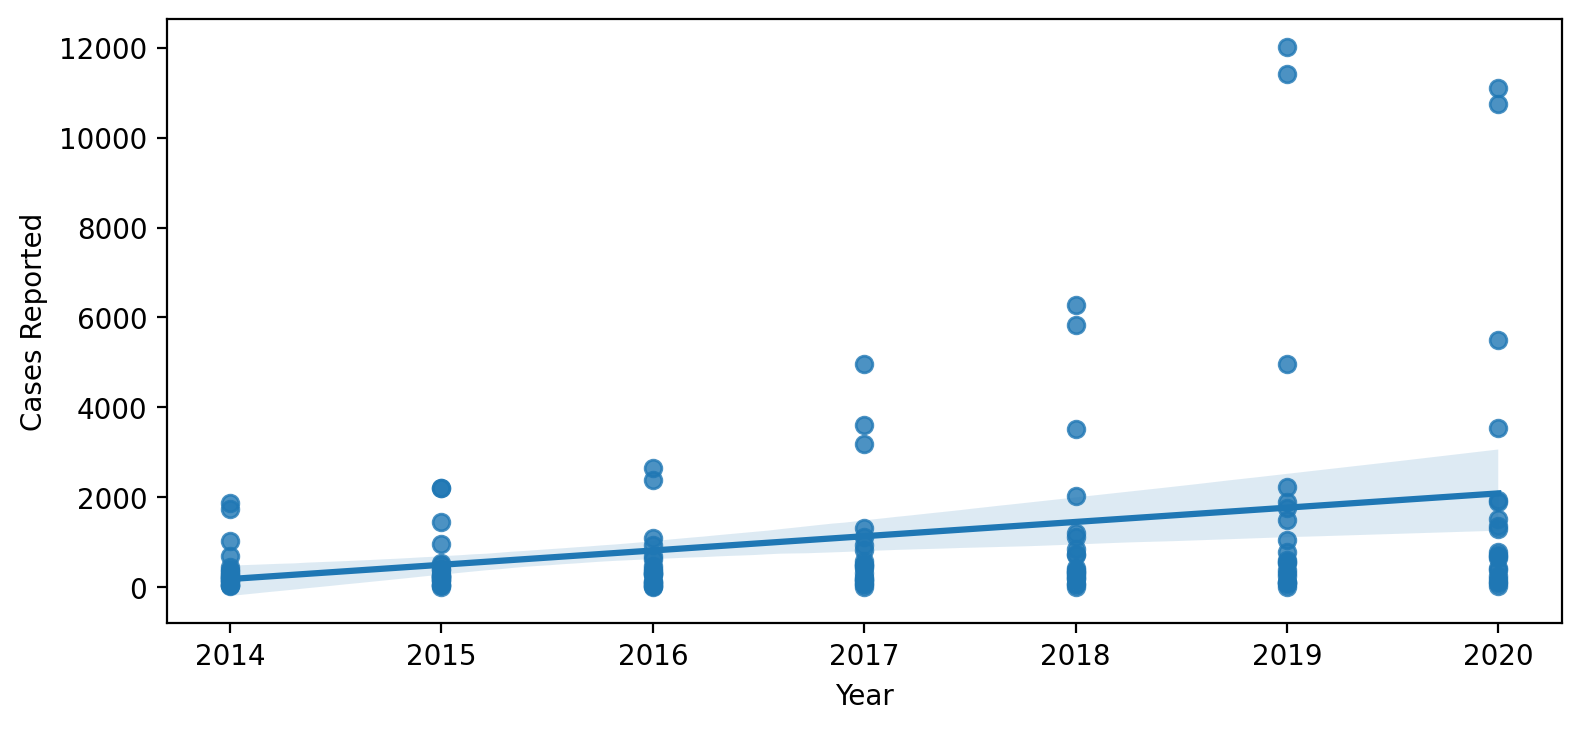

In [22]:
plt.figure(figsize=(9,4), dpi=200, alpha=0.5)
sns.regplot(data=df, x='Year', y='Cases Reported')

<AxesSubplot:xlabel='Year', ylabel='Cases Reported'>

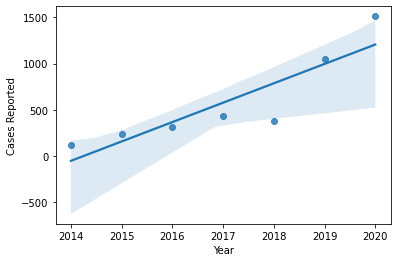

In [23]:
sns.regplot(data=one_state,x='Year',y='Cases Reported')

In [24]:
#drop unwanted columns
X = one_state.drop(['Unique Code', 'State', 'Cases Reported'], axis=1)
y = one_state['Cases Reported']
X

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
21,2014,107823158,11850000.0,2100000.0,11570000.0
22,2015,109798353,16580000.0,3150000.0,16300000.0
23,2016,113042198,19630000.0,5820000.0,19340000.0
24,2017,117153097,24100000.0,12030000.0,23810000.0
25,2018,121741741,28400000.0,20520000.0,28130000.0
26,2019,122256981,39340000.0,33140000.0,39060000.0
27,2020,124799926,48390000.0,43950000.0,48110000.0


In [25]:
y

21     114
22     242
23     309
24     433
25     374
26    1050
27    1512
Name: Cases Reported, dtype: int64

Train and Test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [27]:
X_train

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
26,2019,122256981,39340000.0,33140000.0,39060000.0
27,2020,124799926,48390000.0,43950000.0,48110000.0
23,2016,113042198,19630000.0,5820000.0,19340000.0
25,2018,121741741,28400000.0,20520000.0,28130000.0


In [28]:
X_test

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
24,2017,117153097,24100000.0,12030000.0,23810000.0
21,2014,107823158,11850000.0,2100000.0,11570000.0
22,2015,109798353,16580000.0,3150000.0,16300000.0


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
predictions = model.predict(X_test)
predictions

array([ 394.13420562, -135.00444352,  221.21981649])

In [31]:
y_test

24    433
21    114
22    242
Name: Cases Reported, dtype: int64

In [32]:
mean_cases = y.mean()
mean_cases

576.2857142857143

<AxesSubplot:xlabel='Cases Reported', ylabel='Count'>

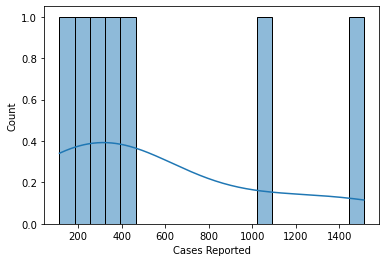

In [33]:
sns.histplot(data=one_state, x='Cases Reported', bins=20, kde=True)

In [34]:
mae = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [35]:
mean_cases, mae, rmse

(576.2857142857143, 102.88347380420267, 145.99723615266194)

In [36]:
residuals = y_test - predictions

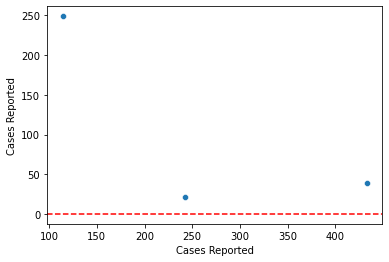

In [37]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', ls='--')

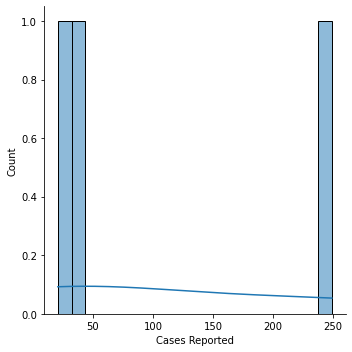

In [38]:
sns.displot(residuals, bins=20, kde=True)

In [39]:
final_model = LinearRegression()
final_model.fit(X.values,y.values)

LinearRegression()

In [40]:
X

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
21,2014,107823158,11850000.0,2100000.0,11570000.0
22,2015,109798353,16580000.0,3150000.0,16300000.0
23,2016,113042198,19630000.0,5820000.0,19340000.0
24,2017,117153097,24100000.0,12030000.0,23810000.0
25,2018,121741741,28400000.0,20520000.0,28130000.0
26,2019,122256981,39340000.0,33140000.0,39060000.0
27,2020,124799926,48390000.0,43950000.0,48110000.0


In [41]:
y

21     114
22     242
23     309
24     433
25     374
26    1050
27    1512
Name: Cases Reported, dtype: int64

In [42]:
final_model.coef_

array([-2.94123516e+02,  1.29440299e-05,  7.87757733e-03, -2.88240718e-06,
       -7.79369534e-03])

In [43]:
predicted_crimes = final_model.predict(X.values)
predicted_crimes

array([ 114.49439363,  239.67313247,  313.61903003,  429.7598475 ,
        375.37887753, 1047.15455817, 1513.92016066])

In [44]:
y

21     114
22     242
23     309
24     433
25     374
26    1050
27    1512
Name: Cases Reported, dtype: int64

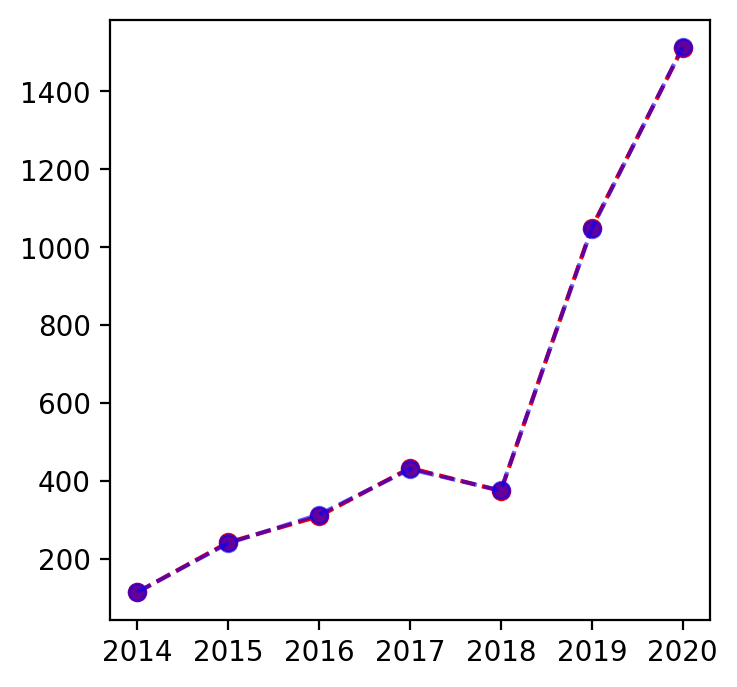

In [45]:
fig = plt.figure(figsize=(6,6), dpi=200)
axes = fig.add_axes([0,0,0.5,0.5])
axes.plot(one_state['Year'], one_state['Cases Reported'], 'o', color='red', linestyle='dashed',label="Actual Data");
axes.plot(one_state['Year'], predicted_crimes, 'o', color='blue', linestyle='dashed', alpha=0.6,label="Predicted Data");

<BarContainer object of 7 artists>

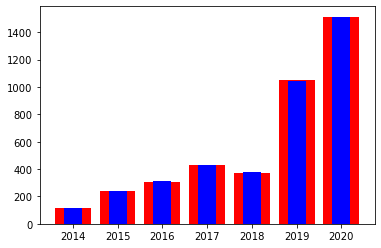

In [46]:
plt.bar(one_state['Year'], one_state['Cases Reported'],color="red",label="Actual Data")
plt.bar(one_state['Year'], predicted_crimes,0.4,color="blue",label="Predicted Data")

In [47]:
one_state.head()

,Unique Code,State,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions,Cases Reported
21,4,Bihar,2014,107823158,11850000.0,2100000.0,11570000.0,114
22,4,Bihar,2015,109798353,16580000.0,3150000.0,16300000.0,242
23,4,Bihar,2016,113042198,19630000.0,5820000.0,19340000.0,309
24,4,Bihar,2017,117153097,24100000.0,12030000.0,23810000.0,433
25,4,Bihar,2018,121741741,28400000.0,20520000.0,28130000.0,374


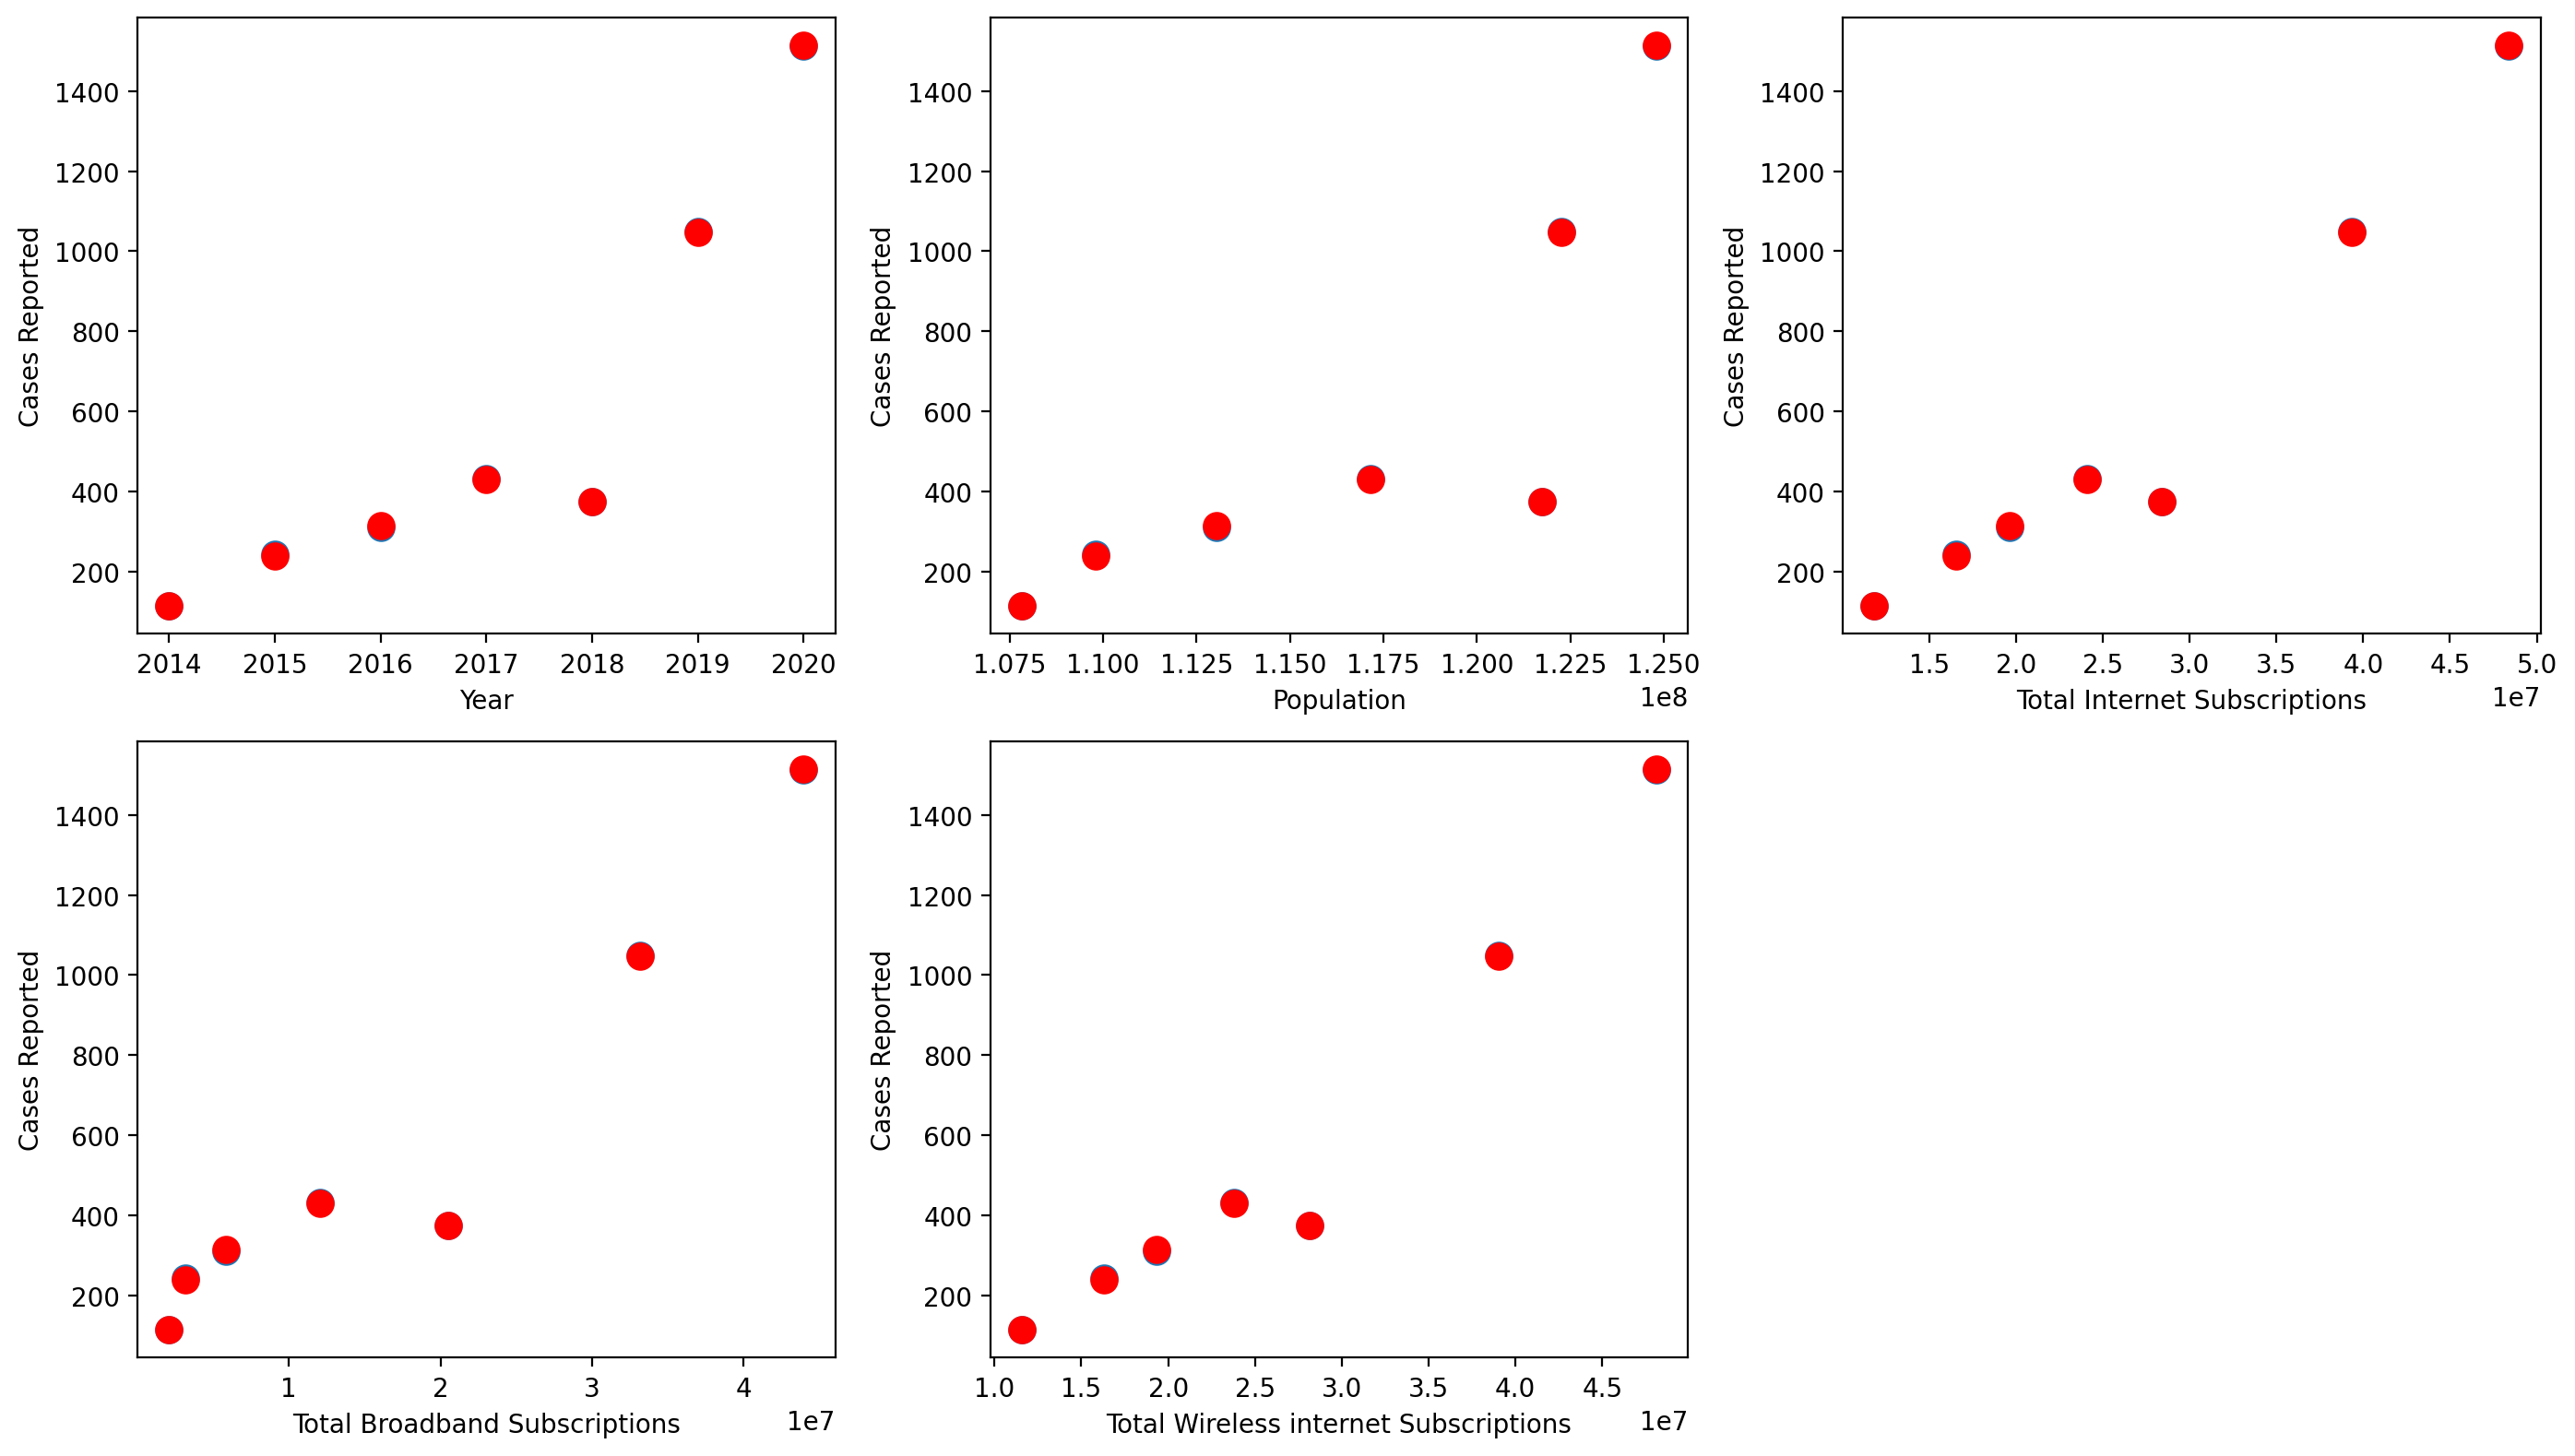

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8), dpi=200)

axes[0,0].plot(one_state['Year'], one_state['Cases Reported'], 'o',  markersize=10)
axes[0,0].plot(one_state['Year'], predicted_crimes, 'o', color='red', markersize=10)
axes[0,0].set_ylabel('Cases Reported')
axes[0,0].set_xlabel('Year')

axes[0,1].plot(one_state['Population'], one_state['Cases Reported'], 'o', markersize=10)
axes[0,1].plot(one_state['Population'], predicted_crimes, 'o', color='red', markersize=10)
axes[0,1].set_ylabel('Cases Reported')
axes[0,1].set_xlabel('Population')

axes[0,2].plot(one_state['Total Internet Subscriptions'], one_state['Cases Reported'], 'o', markersize=10)
axes[0,2].plot(one_state['Total Internet Subscriptions'], predicted_crimes, 'o', color='red', markersize=10)
axes[0,2].set_ylabel('Cases Reported')
axes[0,2].set_xlabel('Total Internet Subscriptions')

axes[1,0].plot(one_state['Total Broadband Subscriptions'], one_state['Cases Reported'], 'o', markersize=10)
axes[1,0].plot(one_state['Total Broadband Subscriptions'], predicted_crimes, 'o', color='red', markersize=10)
axes[1,0].set_ylabel('Cases Reported')
axes[1,0].set_xlabel('Total Broadband Subscriptions')

axes[1,1].plot(one_state['Total Wireless internet Subscriptions'], one_state['Cases Reported'], 'o', markersize=10)
axes[1,1].plot(one_state['Total Wireless internet Subscriptions'], predicted_crimes, 'o', color='red', markersize=10)
axes[1,1].set_ylabel('Cases Reported')
axes[1,1].set_xlabel('Total Wireless internet Subscriptions')

fig.delaxes(axes[1,2])

plt.tight_layout()

In [49]:
dump(final_model, 'saved_model.joblib')
loaded_model = load('saved_model.joblib')
loaded_model.coef_

array([-2.94123516e+02,  1.29440299e-05,  7.87757733e-03, -2.88240718e-06,
       -7.79369534e-03])

In [50]:
X.shape

(7, 5)

In [51]:
X

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
21,2014,107823158,11850000.0,2100000.0,11570000.0
22,2015,109798353,16580000.0,3150000.0,16300000.0
23,2016,113042198,19630000.0,5820000.0,19340000.0
24,2017,117153097,24100000.0,12030000.0,23810000.0
25,2018,121741741,28400000.0,20520000.0,28130000.0
26,2019,122256981,39340000.0,33140000.0,39060000.0
27,2020,124799926,48390000.0,43950000.0,48110000.0


In [52]:
y

21     114
22     242
23     309
24     433
25     374
26    1050
27    1512
Name: Cases Reported, dtype: int64

In [53]:
data.head()

,State/UT,Cases in 2015,Cases in 2016,Cases in 2017,Cases in 2018,Cases in 2019,Cases in 2020,Cases in 2021,Total Crimes
0,Andhra Pradesh,536,616,931,1207,1886,2436,2645,10257
1,Arunachal Pradesh,6,4,1,7,8,10,13,49
2,Assam,483,696,1120,2022,2231,2765,3024,12341
3,Bihar,242,309,433,374,1050,1345,1654,5407
4,Chhattisgarh,103,90,171,139,175,234,315,1227


In [54]:
years_known = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
state=state_info['state']
all_states = list(set(df['State'].to_list()))
all_states
all_states.sort()
state_df = df[df['State'] == state]
state_df

,Unique Code,State,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions,Cases Reported
21,4,Bihar,2014,107823158,11850000.0,2100000.0,11570000.0,114
22,4,Bihar,2015,109798353,16580000.0,3150000.0,16300000.0,242
23,4,Bihar,2016,113042198,19630000.0,5820000.0,19340000.0,309
24,4,Bihar,2017,117153097,24100000.0,12030000.0,23810000.0,433
25,4,Bihar,2018,121741741,28400000.0,20520000.0,28130000.0,374
26,4,Bihar,2019,122256981,39340000.0,33140000.0,39060000.0,1050
27,4,Bihar,2020,124799926,48390000.0,43950000.0,48110000.0,1512


In [55]:
years_data_known = state_df['Cases Reported'].to_list()
years_data_known

[114, 242, 309, 433, 374, 1050, 1512]

In [56]:
years_display = [x for x in years_known]
years_display.append(int(state_info['year']))
sample_input=[]
sample_input.append(state_info['year'])
sample_input.append(state_info['population'])
sample_input.append(state_info['tis'])
sample_input.append(state_info['tbs'])
sample_input.append(state_info['twis'])
input=[[int(n) for n in sample_input]]
result=loaded_model.predict(input)
year=input[0][0]
years_known.append(year)
state_data = state_df.to_dict(orient='list')
years_data_known.append(result[0])


State: Bihar
Predicted crime in 2023 is 20991


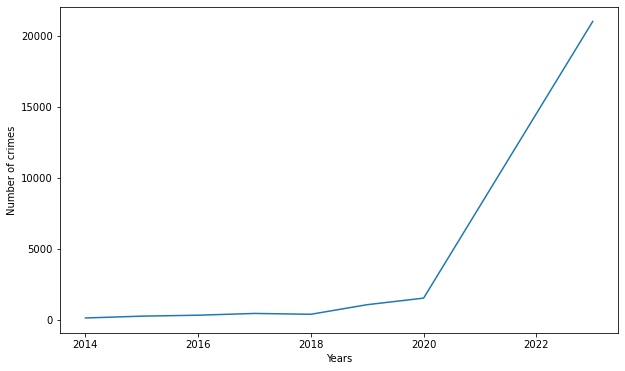

In [58]:
#grapgh of prediction
out=result[0]
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.plot(years_known,years_data_known)
print("State:",state)
print("Predicted crime in",year,"is",int(out))

In [61]:
model.score(X_test,y_test)

-0.24064993389174694